In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
# A tabela mostra dados de sites foi finalizado ou não baseado no "tempo_estimado_de_finalização" e "preço_proposto_para_pagamento_do_serviço"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
mapping = {"expected_hours": "horas_esperadas", "price": "preco", "unfinished":"nao_finalizado"}
dados = dados.rename(columns = mapping)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
dados["finalizado"] = dados.nao_finalizado.map({0 : 1, 1 : 0})
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


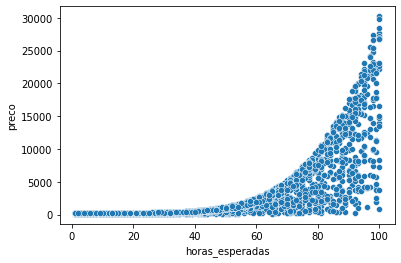

In [ ]:
import seaborn as sns
sns.scatterplot(x = "horas_esperadas", y = "preco", data=dados)

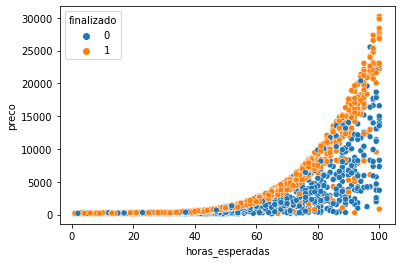

In [ ]:
#"hue" para separar os pontos em cores, baseado em projetos finalizados e não finalizados
sns.scatterplot(x = "horas_esperadas", y = "preco", hue="finalizado", data=dados)

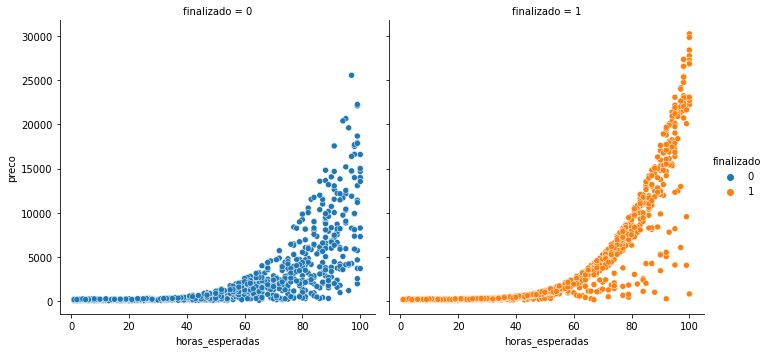

In [ ]:
sns.relplot(x = "horas_esperadas", y = "preco", hue="finalizado", col="finalizado", data=dados)

In [ ]:
x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

In [ ]:
#Usando o mesmo modelo das ultimas aulas do treinamento...
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

seed = 30  #ordem dos numeros aleatórios
np.random.seed(seed)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state= seed, test_size = 0.25,
                                                        stratify = y)
print(f"Treinamos com {len(treino_x)} e testamos com {len(teste_x)} elementos")
model = LinearSVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
taxa_de_acertos = accuracy_score(teste_y, previsoes)
print(f"Taxa de acertos: {round(taxa_de_acertos*100)} %")

Treinamos com 1617 e testamos com 540 elementos
Taxa de acertos: 57 %


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base)
print(f"A acurácia do algoritmo de base foi de : {round(acuracia*100)} %")

A acurácia do algoritmo de base foi de : 53 %


In [ ]:
#É importante ter um algoritmo de base, ou um chute, para saber como nosso modelo está indo

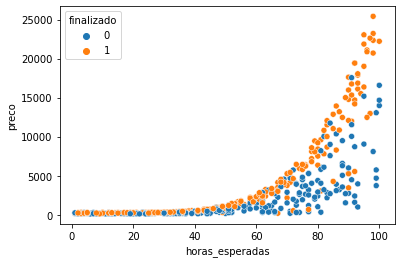

In [ ]:
sns.scatterplot(x = "horas_esperadas", y = "preco", hue=teste_y, data=teste_x)

In [ ]:
#analisando as coordenadas e "pixels" (x : horas_esperadas, y : preço)
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 100 25427


In [ ]:
pixels = 1000 #aqui seria a precisão (numero de divisões ou fatias em x ou em y) de forma a formar uma matriz para decidirmos a classificação de uma ponto. Quanto maior melhor 
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/ pixels)

In [ ]:
np.meshgrid(eixo_x, eixo_y)  #criou uma matriz 100 x 100

[array([[ 1.   ,  1.099,  1.198, ..., 99.703, 99.802, 99.901],
        [ 1.   ,  1.099,  1.198, ..., 99.703, 99.802, 99.901],
        [ 1.   ,  1.099,  1.198, ..., 99.703, 99.802, 99.901],
        ...,
        [ 1.   ,  1.099,  1.198, ..., 99.703, 99.802, 99.901],
        [ 1.   ,  1.099,  1.198, ..., 99.703, 99.802, 99.901],
        [ 1.   ,  1.099,  1.198, ..., 99.703, 99.802, 99.901]]),
 array([[  100.   ,   100.   ,   100.   , ...,   100.   ,   100.   ,
           100.   ],
        [  125.327,   125.327,   125.327, ...,   125.327,   125.327,
           125.327],
        [  150.654,   150.654,   150.654, ...,   150.654,   150.654,
           150.654],
        ...,
        [25351.019, 25351.019, 25351.019, ..., 25351.019, 25351.019,
         25351.019],
        [25376.346, 25376.346, 25376.346, ..., 25376.346, 25376.346,
         25376.346],
        [25401.673, 25401.673, 25401.673, ..., 25401.673, 25401.673,
         25401.673]])]

In [ ]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
print(xx.ravel()) #As funções numpy.ravel() retornam array achatado contíguo (array 1D com todos os elementos de array de entrada e com o mesmo tipo).

[ 1.     1.099  1.198 ... 99.703 99.802 99.901]


In [ ]:
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.0000000e+00, 1.0000000e+02],
       [1.0990000e+00, 1.0000000e+02],
       [1.1980000e+00, 1.0000000e+02],
       ...,
       [9.9703000e+01, 2.5401673e+04],
       [9.9802000e+01, 2.5401673e+04],
       [9.9901000e+01, 2.5401673e+04]])

In [ ]:
Z = model.predict(pontos)
print(Z, Z.shape)

[0 0 0 ... 1 1 1] (1000000,)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
Z = Z.reshape(xx.shape) #mapeamento das duas dimensões

[]

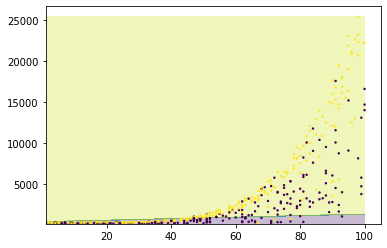

In [ ]:
#borda de decisão:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=2)
plt.plot()

In [ ]:
#precisamos de algum modelo melhor do que o Linear...

Treinamos com 1617 e testamos com 540 elementos
Taxa de acertos: 55 %
1 100 100 30223


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


[]

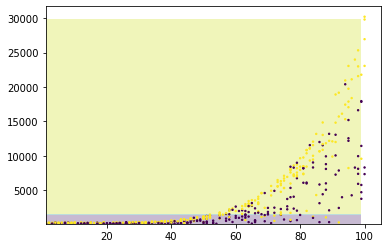

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

seed = 5  #ordem dos numeros aleatórios
np.random.seed(seed)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                        stratify = y)
print(f"Treinamos com {len(treino_x)} e testamos com {len(teste_x)} elementos")
model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
taxa_de_acertos = accuracy_score(teste_y, previsoes)
print(f"Taxa de acertos: {round(taxa_de_acertos*100)} %")

x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max, y_min, y_max)

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=2)
plt.plot()

Treinamos com 1617 e testamos com 540 elementos
Taxa de acertos: 66.9 %
-1.7348767953644189 1.7418048354450535 -0.5962799114048444 5.406738368968601


[]

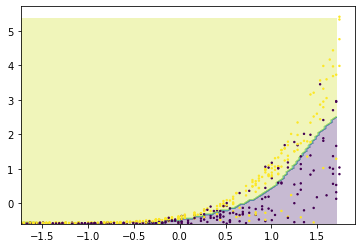

In [ ]:
from sklearn.preprocessing import StandardScaler #Ajustando a escala
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

seed = 5 
np.random.seed(seed)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                        stratify = y)

scaler = StandardScaler()

scaler.fit(raw_treino_x)   #treinar o scaler
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

print(f"Treinamos com {len(treino_x)} e testamos com {len(teste_x)} elementos")

model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
taxa_de_acertos = accuracy_score(teste_y, previsoes)
print(f"Taxa de acertos: {round(taxa_de_acertos*100, 1)} %")

data_x = teste_x[:,0]     #após o uso do sclaer, perdemos a formatação do pandas
data_y = teste_x[:,1]

x_min = data_x.min()          
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
print(x_min, x_max, y_min, y_max)

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=2)
plt.plot()